<a href="https://colab.research.google.com/github/GAYITRIKURUBA/Cartoonify.ipynb/blob/main/Cartoonify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install easygui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 KB 3.3 MB/s eta 0:00:00


In [2]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
     

In [3]:
""" fileopenbox opens the box to choose file
and help us store file path as string """
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

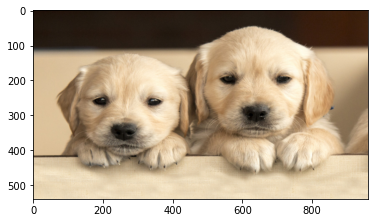

In [15]:
ImagePath="/content/dog-jpg.jpg"
#read the image
originalmage = cv2.imread(ImagePath)
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
#print(originalmage)  # image is stored in form of numbers
# confirm that image is chosen
if originalmage is None:
  print("Can not find any image. Choose appropriate file")
  sys.exit()
ReSized1 = cv2.resize(originalmage, (960, 540))
plt.imshow(ReSized1, cmap='gray')

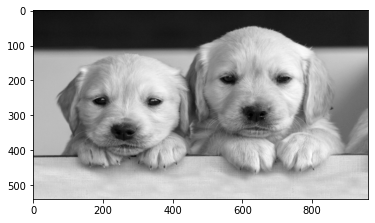

In [16]:
#converting an image to grayscale
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (960, 540))
plt.imshow(ReSized2, cmap='gray')

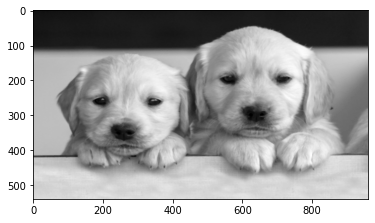

In [17]:
#applying median blur to smoothen an image
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
plt.imshow(ReSized3, cmap='gray')

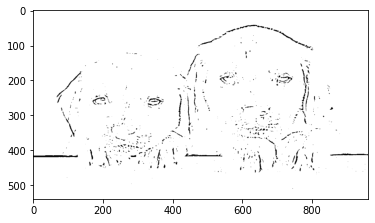

In [18]:
#retrieving the edges for cartoon effect
#by using thresholding technique
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 9, 9)
ReSized4 = cv2.resize(getEdge, (960, 540))
plt.imshow(ReSized4, cmap='gray')

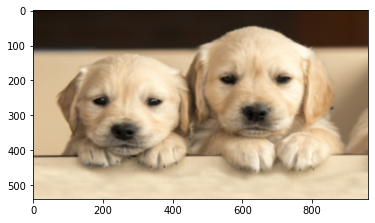

In [19]:
#applying bilateral filter to remove noise 
#and keep edge sharp as required
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (960, 540))
plt.imshow(ReSized5, cmap='gray')

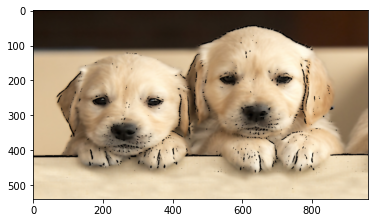

In [20]:
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
ReSized6 = cv2.resize(cartoonImage, (960, 540))
plt.imshow(ReSized6, cmap='gray')

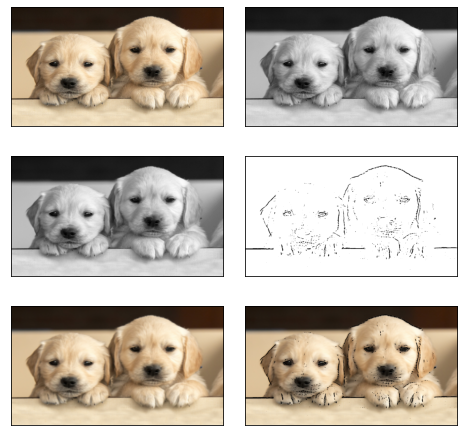

In [21]:
# Plotting the whole transition
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
#//save button code
plt.show()